## Software to plot comparisons between ray-tracing and various geolocation and refractive index determination techniques.

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/davitpy/Desktop/ray_data/data.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 0 to 2539
Data columns (total 22 columns):
beam           2540 non-null int64
elv_init       2540 non-null float64
gran           2540 non-null float64
h              2540 non-null float64
lat            2540 non-null float64
lon            2540 non-null float64
nr             2540 non-null float64
r              2540 non-null float64
radar          2540 non-null object
rel            2540 non-null float64
th             2540 non-null float64
time           2540 non-null object
Loc_time       2540 non-null float64
lgc_rt         2540 non-null float64
height         2540 non-null float64
h_2p           2540 non-null float64
th_2p          2540 non-null float64
lgc_2p         2540 non-null float64
nr_2p          2540 non-null float64
phase          2540 non-null int64
lgc_diff_2p    2540 non-null float64
nr_diff_2p     2540 non-null float64
dtypes: float64(18), int64(2), object(2)
memory usage: 456.4+ KB


In [5]:
df.tail(64)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lgc_diff_2p,nr_diff_2p
2476,3,8.2,1155000,10000,61.972408,-103.809326,0.972615,6564003.5,sas,8.149123,0.172666,2012-09-20 16:00:00,8.079378,1100.057449,193.0035,263.963259,0.173162,1103.216269,0.967546,3,-3.158820,0.005069
2477,3,8.2,1165000,10000,62.055271,-103.782875,0.971812,6565320.0,sas,7.868501,0.174132,2012-09-20 16:00:00,8.081142,1109.396899,194.3200,267.080387,0.174594,1112.337876,0.966968,3,-2.940977,0.004844
2478,3,8.1,505000,10000,56.502239,-105.414581,0.997595,6460854.0,sas,11.926105,0.075954,2012-09-20 16:00:00,7.972361,483.901590,89.8540,90.526489,0.077453,493.450654,1.004023,3,-9.549064,-0.006428
2479,3,8.1,515000,10000,56.587723,-105.391380,0.995736,6463602.5,sas,11.516492,0.077466,2012-09-20 16:00:00,7.973908,493.533773,92.6025,92.704681,0.078963,503.072188,1.003496,3,-9.538415,-0.007760
2480,3,8.1,525000,10000,56.673141,-105.368141,0.993459,6465934.5,sas,10.941113,0.078977,2012-09-20 16:00:00,7.975457,503.161541,94.9345,94.897605,0.080472,512.687218,1.002967,3,-9.525676,-0.009508
2481,3,8.1,815000,10000,59.134178,-104.674469,0.982945,6507444.0,sas,9.267847,0.122485,2012-09-20 16:00:00,8.021702,780.350776,136.4440,164.831030,0.123769,788.532042,0.987266,3,-8.181266,-0.004321
2482,3,8.1,825000,10000,59.218468,-104.649834,0.982863,6509177.0,sas,9.314293,0.123975,2012-09-20 16:00:00,8.023344,789.843736,138.1770,167.458602,0.125245,797.935439,0.986713,3,-8.091703,-0.003850
2483,3,8.1,835000,10000,59.302727,-104.625160,0.982779,6510911.0,sas,9.357841,0.125464,2012-09-20 16:00:00,8.024989,799.332235,139.9110,170.100406,0.126720,807.331260,0.986158,3,-7.999026,-0.003380
2484,3,8.1,845000,10000,59.386940,-104.600426,0.982693,6512653.0,sas,9.401396,0.126953,2012-09-20 16:00:00,8.026638,808.816461,141.6530,172.756425,0.128193,816.719475,0.985604,3,-7.903014,-0.002911
2485,3,8.1,855000,10000,59.471111,-104.575645,0.982605,6514403.5,sas,9.444956,0.128441,2012-09-20 16:00:00,8.028290,818.295940,143.4035,175.426643,0.129666,826.100051,0.985048,3,-7.804111,-0.002443


In [6]:
df['lgc_diff_2p'].describe()

count    2540.000000
mean       -5.479140
std         4.621637
min        -9.554394
25%        -8.821146
50%        -6.222483
75%        -4.791777
max        11.452051
Name: lgc_diff_2p, dtype: float64

In [7]:
df['nr_diff_2p'].describe()

count    2.540000e+03
mean    -1.337513e-17
std      4.368882e-03
min     -1.012463e-02
25%     -3.383873e-03
50%      5.405977e-04
75%      3.468714e-03
max      1.209380e-02
Name: nr_diff_2p, dtype: float64

In [8]:
df['h_2p'].describe()

count    2540.000000
mean      236.267388
std       105.881968
min        89.017760
25%       148.862298
50%       241.804608
75%       282.110226
max       486.795573
Name: h_2p, dtype: float64

In [9]:
bins = np.arange(-205, 205,10)

In [10]:
bins

array([-205, -195, -185, -175, -165, -155, -145, -135, -125, -115, -105,
        -95,  -85,  -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,
         15,   25,   35,   45,   55,   65,   75,   85,   95,  105,  115,
        125,  135,  145,  155,  165,  175,  185,  195])

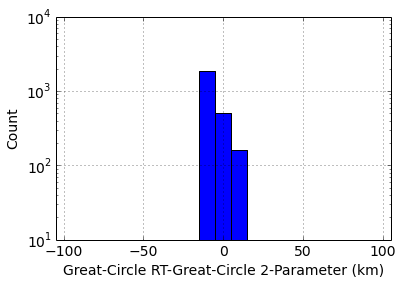

In [11]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-105, 105)
plt.ylim(10,10000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

In [12]:
#df['lgc_diff_sm'].hist(bins=bins, log=True)
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
#plt.ylabel('Count')

In [13]:
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
#plt.ylabel('Count')

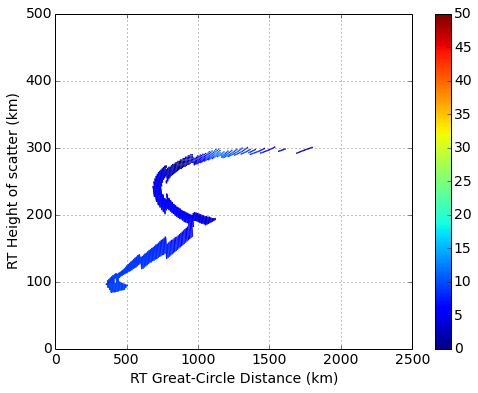

In [14]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=50) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

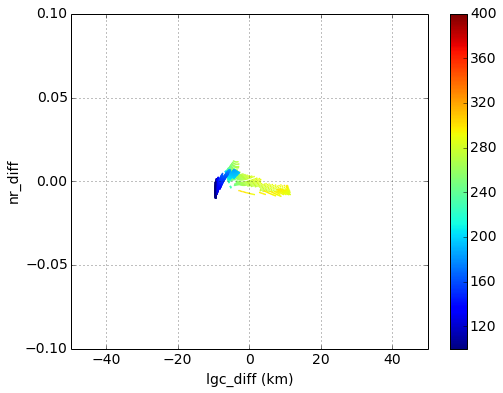

In [15]:
xvar = df['lgc_diff_2p']
yvar = df['nr_diff_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('lgc_diff (km)')
ax.set_xlim(-50, 50)
ax.set_ylim(-.10, .10)
ax.set_ylabel ('nr_diff')
ax.grid()

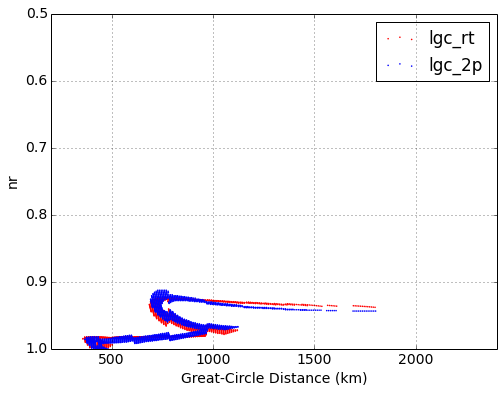

In [16]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', vmin=100, vmax=400,label='lgc_rt') 
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', vmin=100, vmax=400,label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1.0, 0.5)
ax.set_ylabel ('nr')
ax.grid()
ax.legend(loc='upper right')

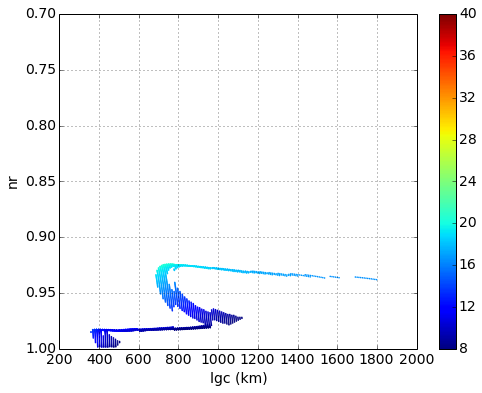

In [17]:
xvar = df['lgc_rt']
yvar = df['nr']
color = df['elv_init']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=8, vmax=40) 
plt.colorbar(scat)
ax.set_xlabel ('lgc (km)')
ax.set_xlim(200, 2000)
ax.set_ylim(1.0, 0.7)
ax.set_ylabel ('nr')
ax.grid()

In [18]:
df['lgc_diff_2p'].describe()

count    2540.000000
mean       -5.479140
std         4.621637
min        -9.554394
25%        -8.821146
50%        -6.222483
75%        -4.791777
max        11.452051
Name: lgc_diff_2p, dtype: float64

In [19]:
df['nr_diff_2p'].describe()

count    2.540000e+03
mean    -1.337513e-17
std      4.368882e-03
min     -1.012463e-02
25%     -3.383873e-03
50%      5.405977e-04
75%      3.468714e-03
max      1.209380e-02
Name: nr_diff_2p, dtype: float64

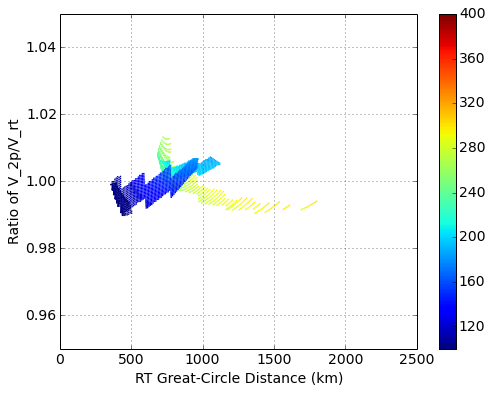

In [20]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [21]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_sm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [22]:
#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_cm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 0 to 2539
Data columns (total 22 columns):
beam           2540 non-null int64
elv_init       2540 non-null float64
gran           2540 non-null float64
h              2540 non-null float64
lat            2540 non-null float64
lon            2540 non-null float64
nr             2540 non-null float64
r              2540 non-null float64
radar          2540 non-null object
rel            2540 non-null float64
th             2540 non-null float64
time           2540 non-null object
Loc_time       2540 non-null float64
lgc_rt         2540 non-null float64
height         2540 non-null float64
h_2p           2540 non-null float64
th_2p          2540 non-null float64
lgc_2p         2540 non-null float64
nr_2p          2540 non-null float64
phase          2540 non-null int64
lgc_diff_2p    2540 non-null float64
nr_diff_2p     2540 non-null float64
dtypes: float64(18), int64(2), object(2)
memory usage: 456.4+ KB


In [24]:
bins_nr = np.arange(-.055, .095, .01)

In [25]:
bins_nr

array([-0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055,  0.065,  0.075,  0.085])

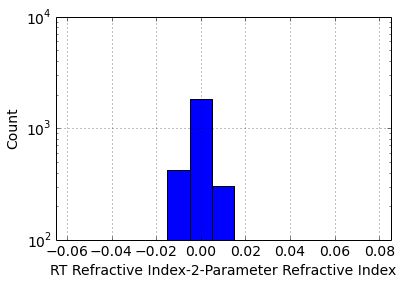

In [26]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.065, .085)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

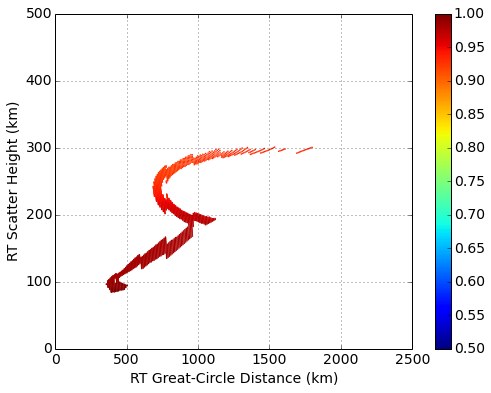

In [27]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

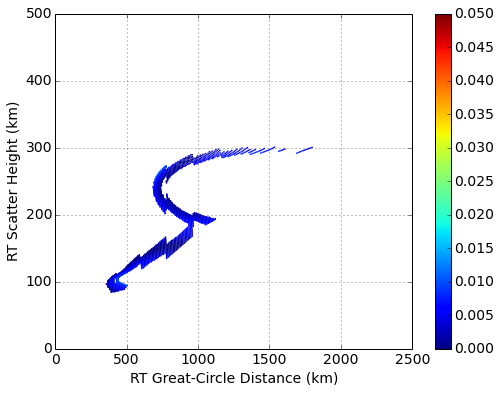

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])  #was 'nr'
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05) #was 0.5,1.0
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()